<a href="https://colab.research.google.com/github/rfb0408/python_data_analyst_study/blob/main/6%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#제대로 학습했을까? / 결과가 신뢰할만한가?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#도미와 빙어(길이와 무게)
# 문제: length weight
# 정답: target
fish = pd.read_csv("fish.csv")

data=np.array(fish.iloc[:,:2])
target=np.array(fish['target'])

In [ ]:
fish

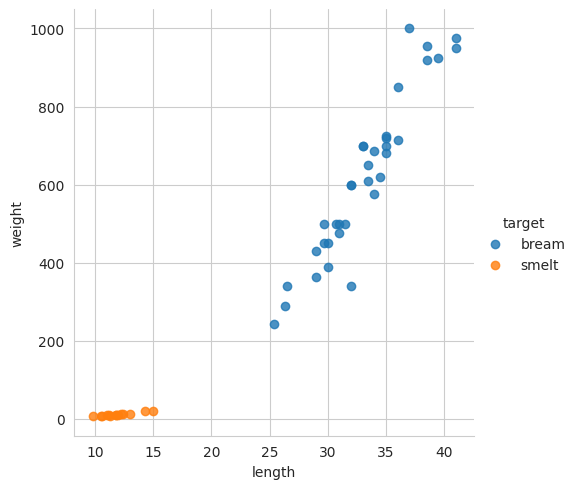

In [ ]:
sns.set_style("whitegrid")
sns.lmplot(data=fish,x='length',y='weight',fit_reg=False, hue='target')

In [ ]:
# k 최근접 이웃 분류 모델
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(data,target)

KNeighborsClassifier()

In [ ]:
a=[40,600]
model.predict([a])

array(['bream'], dtype=object)

<Axes: xlabel='target', ylabel='length'>

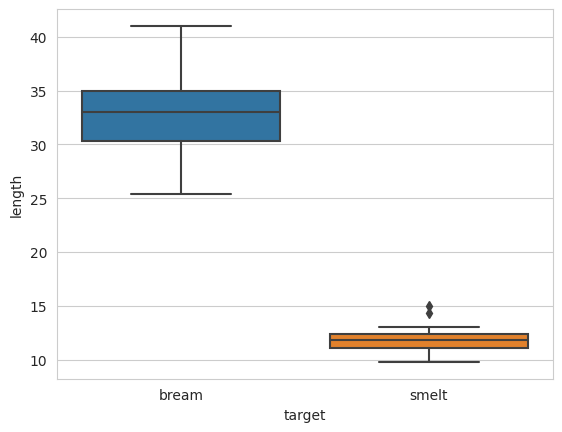

In [ ]:
sns.boxplot(x='target',y='length',data=fish)

<Axes: xlabel='target', ylabel='weight'>

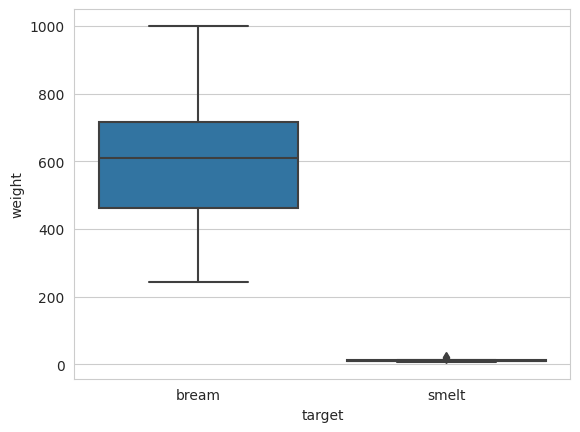

In [ ]:
sns.boxplot(x='target',y='weight',data=fish)

<Axes: >

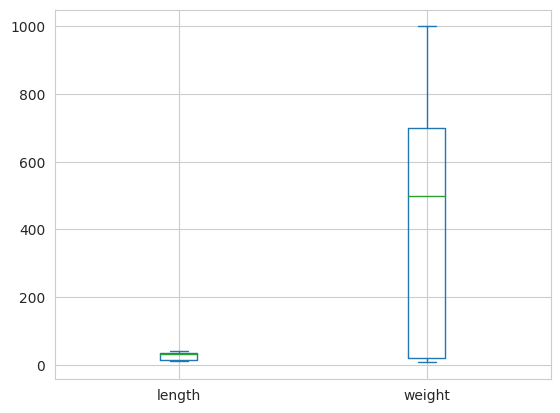

In [ ]:
fish.plot.box()

In [ ]:
#학습하지 않았던 데이터로 시험
# 49개 -> 훈련데이터, 시험데이터
#최대한 많이 훈련데이터에 쏟아야함
#데이터수가 적다면? sklearn 75:25 권장 google 8:2 권장

from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(data,target,test_size=0.2)

<function matplotlib.pyplot.show(close=None, block=None)>

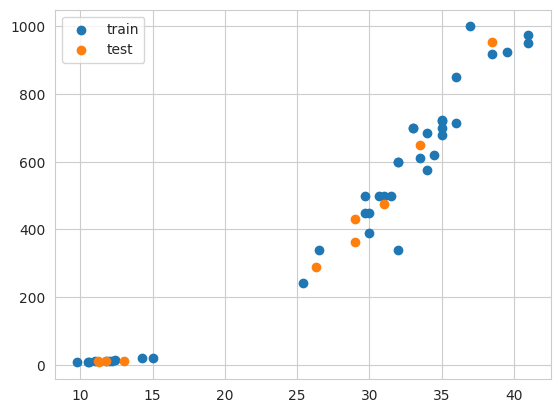

In [ ]:
plt.scatter(train_x[:,0],train_x[:,1])
plt.scatter(test_x[:,0],test_x[:,1])
plt.legend(['train','test'])
plt.show

In [ ]:
model=KNeighborsClassifier()
model.fit(train_x,train_y)

KNeighborsClassifier()

In [ ]:
test_y# 실제값

array(['bream', 'smelt', 'bream', 'bream', 'bream', 'smelt', 'smelt',
       'bream', 'bream', 'smelt'], dtype=object)

In [ ]:
model.predict(test_x) #예측값

array(['bream', 'smelt', 'bream', 'bream', 'bream', 'smelt', 'smelt',
       'bream', 'bream', 'smelt'], dtype=object)

In [ ]:
model.score(test_x,test_y) # 1.0 다 맞았다!

1.0

In [ ]:
# 훈련데이터/시험데이터 -> 훈련데이터(학습)->시험데이터 ==100%
# 그래도 아직 신뢰할 수 없다!

a=[25,150]
model.predict([a])

array(['smelt'], dtype=object)

NameError: ignored

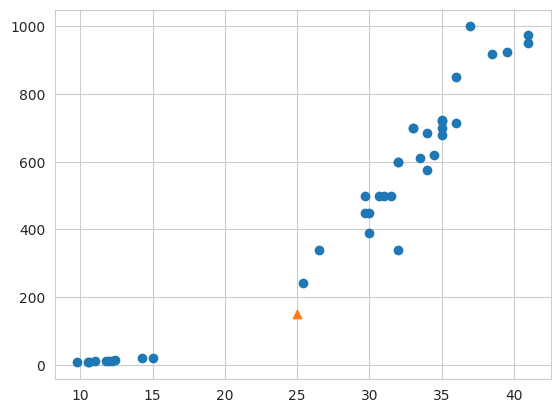

In [ ]:
plt.scatter(train_x[:,0],train_x[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_x[idx,0],train_x[idx,1],marker='D') #왜 오류낫

In [ ]:
# 무게 데이터 하나만 가지고 학습한거나 다름이 없음
# 이렇게 해주자 (길이-길이평균)/길이 표준편차,(무게-무게평균)/무게 표준편차
# 이미지 데이터 : 픽셀값(0~255) <- 무슨 내용이었지?

mean = np.mean(train_x,axis=0)
std=np.std(train_x,axis=0)

train_scaled = (train_x-mean) /std
test_scaled = (test_x-mean) /std # 왜 시험데이터에 훈련데이터의 평균을 빼고 표준편차로 나누나?

model = KNeighborsClassifier()
model.fit(train_scaled,train_y)
model.score(test_scaled,test_y)

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

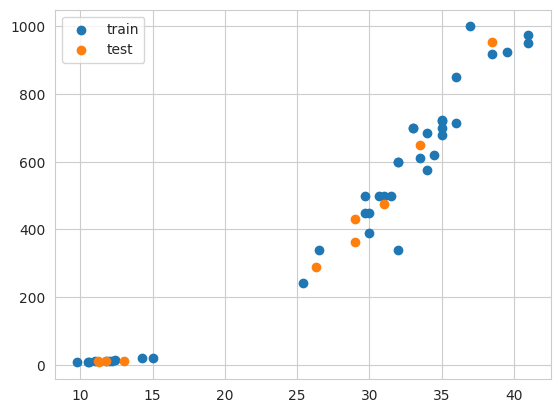

In [ ]:
plt.scatter(train_x[:,0],train_x[:,1])
plt.scatter(test_x[:,0],test_x[:,1])
plt.legend(['train','test'])
plt.show

In [ ]:
a=(([25,150]-mean))/std
model.predict([a])

array(['bream'], dtype=object)

In [ ]:
d.idx = model.kneighbors([a0])
d.idx

NameError: ignored

In [ ]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(a[0],a[1],marker='^')
plt.scatter(train_scaled[idx,0]) # 다 못적음 ㅠㅜ

In [ ]:
#fish2.csv //7 종류의 생선 5개의 특성

In [ ]:
fish2 = pd.read_csv("fish2.csv")

data2=np.array(fish2.iloc[:,1:6]) # 행렬로 바꿔주네... 공부!
target2=np.array(fish2['Species'])

train_x,test_x,train_y,test_y = train_test_split(data,target,test_size=0.2)

mean = np.mean(train_x,axis=0)
std=np.std(train_x,axis=0)

train_scaled = (train_x-mean) /std
test_scaled = (test_x-mean) /std # 모르는 데이터

model = KNeighborsClassifier() # 기본 5개
model.fit(train_scaled,train_y)

score_box=[]
for n in range(1,31):

    model.n_neighbors=n
    score=model.score(test_scaled,test_y)
    score_box.append(score)

model=KNeighborsClassifier(n_neighbors=6)
model.fit(data,target)

KNeighborsClassifier(n_neighbors=6)

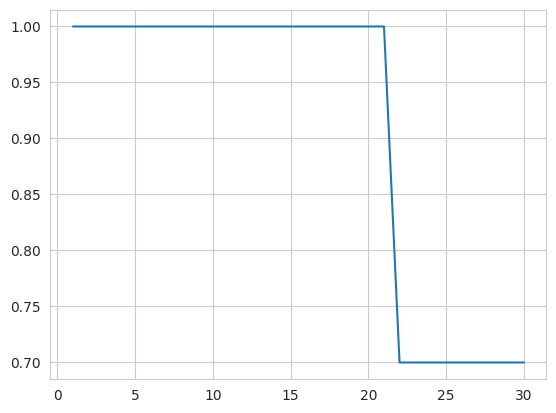

In [ ]:
plt.plot(range(1,31),score_box)

In [ ]:
# fish2.csv // 7종류의 생선 5개의 특성
# 산점도행렬

fish2 = pd.read_csv("fish2.csv")

data = fish2.iloc[:, 1:].to_numpy()
target = fish2['Species'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2)

mean = np.mean(train_x, axis = 0)
std = np.std(train_x, axis = 0)

train_scaled = (train_x - mean) / std
test_scaled = (test_x - mean) / std # 모르는 데이터

model = KNeighborsClassifier()
model.fit(train_scaled, train_y)

score_box = []
for n in range(1, 31):
    model.n_neighbors = n
    score = model.score(test_scaled, test_y)
    score_box.append(score)

model = KNeighborsClassifier(n_neighbors=6)
model.fit(data, target)

In [ ]:
##############################################

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

iris = sns.load_dataset("iris")

data = iris.iloc[:,:-1].to_numpy()
target = iris['species'].to_numpy()

train_x,test_x,train_y,test_y=train_test_split(data,target,test_size=0.2)

dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
dt.score(test_x,test_y)

0.9

<function matplotlib.pyplot.show(close=None, block=None)>

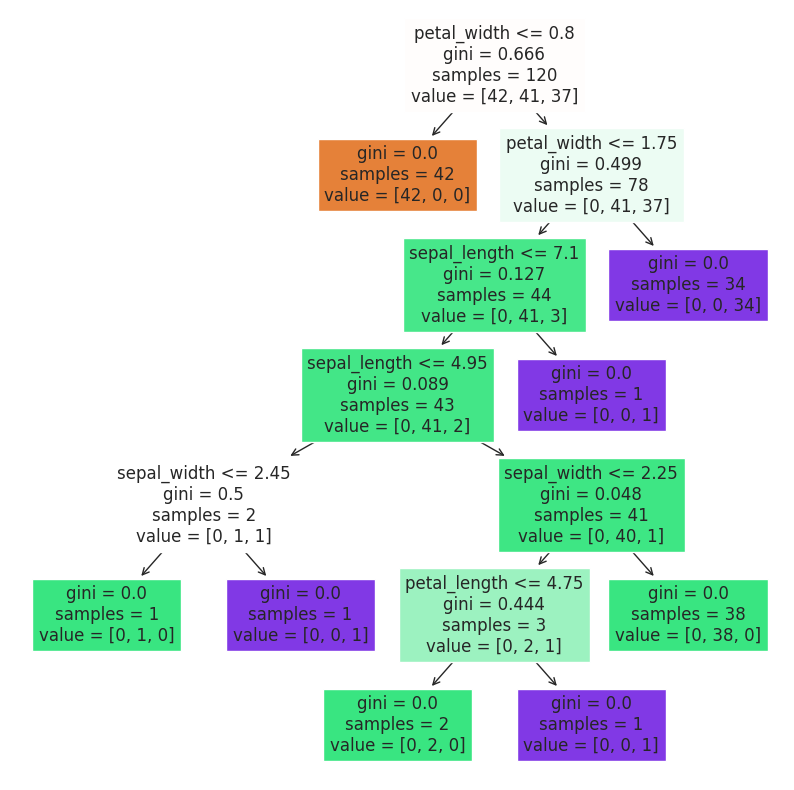

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(dt,feature_names=iris.columns[:-1],filled=True)
plt.show

In [ ]:
#결정트리보다 렌덤 포레스트가 훨씬 좋다

from sklearn.ensemble import RandomForestClassifier
iris = sns.load_dataset("iris")

data = iris.iloc[:,:-1].to_numpy()
target = iris['species'].to_numpy()

rf=RandomForestClassifier(oob_score=True)
rf.fit(data,target)

RandomForestClassifier(oob_score=True)

In [ ]:
rf.oob_score_

0.96

In [ ]:
# 미니 프로젝트1: 1월 5일(금요일) 삼성전자 주가예측

from bs4 import BeautifulSoup
import requests
import random
import time
import pandas as pd


dic={"User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 14_1)"}

In [ ]:
from tqdm import tqdm

total=[]
for n in tqdm(range(1,692)):

    url = requests.get(f"https://finance.naver.com/item/sise_day.naver?code=005930&page={n}",headers=dic)
    html = BeautifulSoup(url.text)

    table = html.find("table")
    table = pd.read_html(str(table))[0].dropna()
    total.append(table)
    time.sleep(random.random()+0.5)

100%|██████████| 691/691 [19:44<00:00,  1.71s/it]


In [ ]:
samsung = pd.concat(total,ignore_index=True)
samsung # 헉 전일비가 양수 음수가 안되어 있다 오염된 데이터

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.01.04,76700.0,300.0,76100.0,77300.0,76100.0,13985875.0
1,2024.01.03,77000.0,2600.0,78500.0,78800.0,77000.0,21753644.0
2,2024.01.02,79600.0,1100.0,78200.0,79800.0,78200.0,17142847.0
3,2023.12.28,78500.0,500.0,77700.0,78500.0,77500.0,17797536.0
4,2023.12.27,78000.0,1400.0,76700.0,78000.0,76500.0,20651042.0
...,...,...,...,...,...,...,...
6899,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
6900,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
6901,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
6902,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0


In [ ]:
samsung=pd.concat(total,ignore_index=True)
del samsung['전일비']
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6904 entries, 0 to 6903
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      6904 non-null   object 
 1   종가      6904 non-null   float64
 2   시가      6904 non-null   float64
 3   고가      6904 non-null   float64
 4   저가      6904 non-null   float64
 5   거래량     6904 non-null   float64
dtypes: float64(5), object(1)
memory usage: 323.8+ KB


In [ ]:
samsung['날짜']=pd.to_datetime(samsung['날짜'])
samsung=samsung.set_index("날짜")
samsung=samsung.sort_index()
samsung

,종가,시가,고가,저가,거래량
날짜,,,,,
1996-06-25,67500.0,66500.0,68300.0,65600.0,112960.0
1996-06-26,67700.0,67600.0,67900.0,66000.0,136630.0
1996-06-27,66900.0,67500.0,67700.0,66700.0,155450.0
1996-06-28,68100.0,67300.0,68500.0,67200.0,138430.0
1996-06-29,68500.0,68100.0,69100.0,67100.0,96710.0
...,...,...,...,...,...
2023-12-27,78000.0,76700.0,78000.0,76500.0,20651042.0
2023-12-28,78500.0,77700.0,78500.0,77500.0,17797536.0
2024-01-02,79600.0,78200.0,79800.0,78200.0,17142847.0


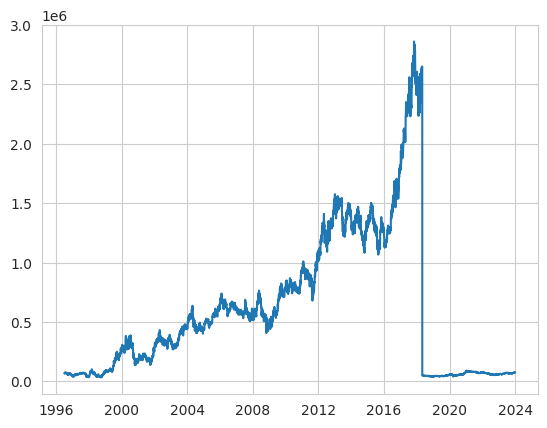

In [ ]:
plt.plot(samsung['종가'])

In [ ]:
data=[]
target=[]

for i in range(len(samsung)-1):
    a=samsung.iloc[i].to_numpy()
    b=samsung.iloc[i+1]['종가']

    data.append(a)
    target.append(b)

data= np.array(data)
target= np.array(target)

In [ ]:
train_x=data[:-250]
train_y=target[:-250]

test_x=data[-250:]
test_y=target[-250:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(train_x,train_y)
rf.score(test_x,test_y)

0.9550878376223235

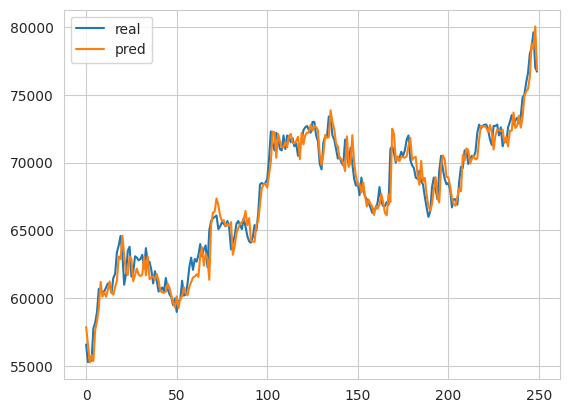

In [ ]:
plt.plot(test_y)
plt.plot(rf.predict(test_x))
plt.legend(['real','pred'])
plt.show()

In [ ]:
rf=RandomForestRegressor()
rf.fit(data,target)
a=samsung.iloc[-1].to_numpy()
rf.predict([a])

array([77145.])

In [ ]:
# 분류 모델
df= pd.read_csv("pima_indians.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data=df.iloc[:,:-1].to_numpy()
target=df['Class'].to_numpy()

train_x,test_x,train_y,test_y=train_test_split(data,target,test_size=0.2)

rf=RandomForestClassifier()
rf.fit(train_x,train_y)
rf.score(test_x,test_y) # 정확도가 75퍼인데 진짜 내가 원하는 데이터를 잘 맞추는지 확인

0.7467532467532467

In [ ]:
#정확도 : 예측한데 몇개 맞았나(내일 주가가 오른다/떨어진다)
#정밀도 : 오른다고 예측한 것들 중에서 실제로 오른것의 비율
#재현율 : 실제 오른것들 중에서 오른다고 예측한 것의 비율
#재현율 -> 절대 틀리면 안될때 사

#암환자 10명/ 컴퓨터가 암환자라고 예측한 암환자 100명

from sklearn.metrics import classification_report
pred=rf.predict(test_x) #예측값
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
test_y #실제 값

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
report = classification_report(pred,test_y)
print(report) # 당뇨다 -> 86% / 당뇨가 아니다->56퍼 당뇨인건 잘 맞추지만, 당뇨가 아닌건 잘 못 맞춘다

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       108
           1       0.56      0.72      0.63        46

    accuracy                           0.75       154
   macro avg       0.71      0.74      0.72       154
weighted avg       0.77      0.75      0.75       154

